/Users/abhishek.s.deshatty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/abhishek.s.deshatty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/abhishek.s.deshatty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


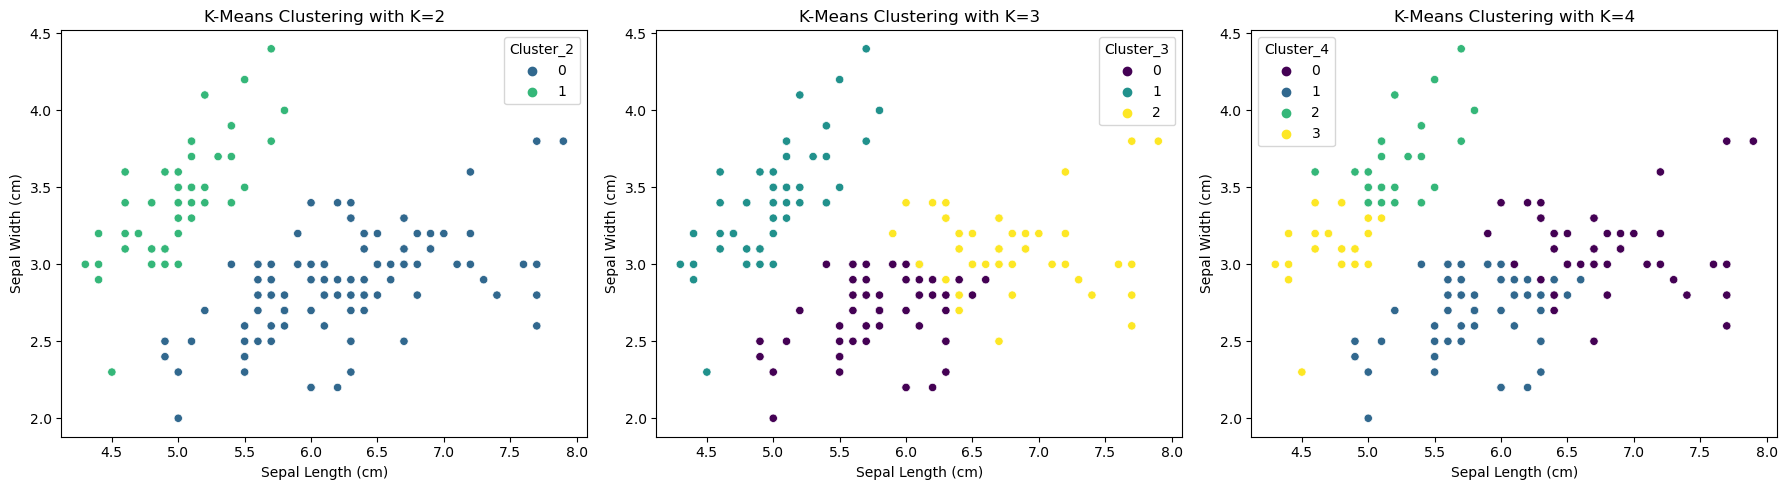

In [6]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply K-Means clustering with K=2, 3, 4
k_values = [2, 3, 4]
clusters = {}

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    clusters[k] = kmeans.labels_

# Add cluster results to the dataframe
for k in k_values:
    data[f'Cluster_{k}'] = clusters[k]

# Visualize the clusters
plt.figure(figsize=(18, 5))

for i, k in enumerate(k_values, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=data['sepal length (cm)'], y=data['sepal width (cm)'], hue=data[f'Cluster_{k}'], palette='viridis')
    plt.title(f'K-Means Clustering with K={k}')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')

plt.tight_layout()
plt.show()

# Display the first few rows of the dataframe with cluster assignments
#data.head()


/Users/abhishek.s.deshatty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


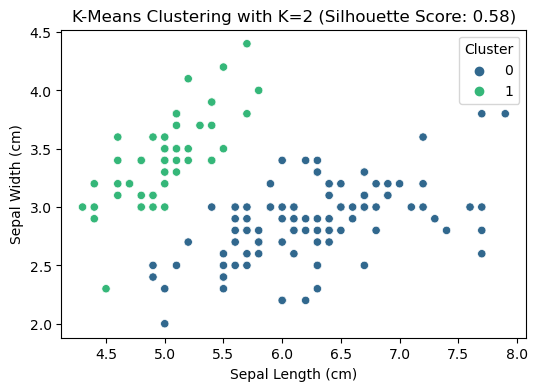

/Users/abhishek.s.deshatty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


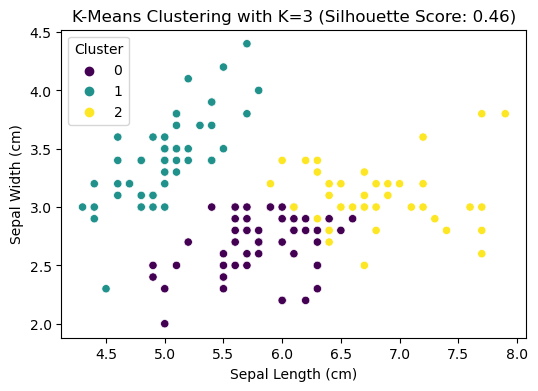

/Users/abhishek.s.deshatty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


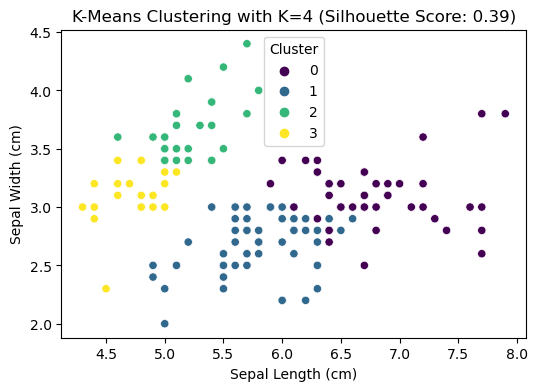

In [14]:
#Prefer This than Above
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Function to apply K-Means and plot results
def apply_kmeans_and_plot(k):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, labels)
    
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=data['sepal length (cm)'], y=data['sepal width (cm)'], hue=labels, palette='viridis')
    plt.title(f'K-Means Clustering with K={k} (Silhouette Score: {silhouette_avg:.2f})')
    plt.xlabel('Sepal Length (cm)')
    plt.ylabel('Sepal Width (cm)')
    plt.legend(title='Cluster')
    plt.show()

# Apply K-Means for K=2, 3, 4 and plot
for k in [2, 3, 4]:
    apply_kmeans_and_plot(k)
